In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [2]:
# load the data
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
df=pd.DataFrame(data=iris.data, columns=['sepal length','sepal width','petal length','petal width'])
df['target']=pd.Series(iris.target)
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Text(0, 0.5, 'Sepal Length')

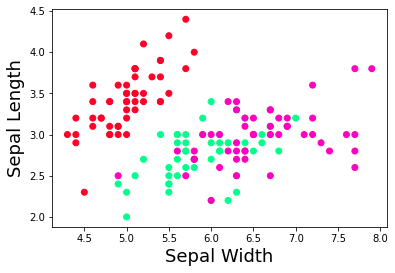

In [4]:
# visualize the data
plt.scatter(x=df['sepal length'], y=df['sepal width'] ,c=iris.target, cmap='gist_rainbow')
plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Sepal Length', fontsize=18)

In [5]:
# Estimate k with elbow at k=5
x = iris.data
kmeans5 = KMeans(n_clusters=5,init = 'k-means++', random_state = 0)
y = kmeans5.fit_predict(x)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 2 4 2 4 2 4 2 2 2 2 4 2 4 2 2 4 2 4 2 4 4
 4 4 4 4 4 2 2 2 2 4 2 4 4 4 2 2 2 4 2 2 2 2 2 4 2 2 1 4 3 1 1 3 2 3 1 3 1
 1 1 4 1 1 1 3 3 4 1 4 3 4 1 3 4 4 1 3 3 3 1 4 4 3 1 1 4 1 1 1 4 1 1 1 4 1
 1 4]


In [6]:
kmeans5.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.24722222, 2.84722222, 4.775     , 1.575     ]])

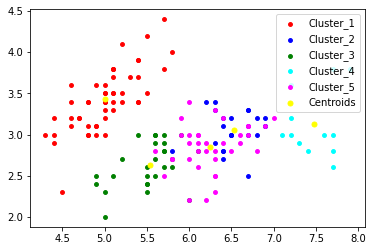

In [7]:
plt.scatter(x[y == 0,0], x[y==0,1], s = 15, c= 'red', label = 'Cluster_1')
plt.scatter(x[y == 1,0], x[y==1,1], s = 15, c= 'blue', label = 'Cluster_2')
plt.scatter(x[y == 2,0], x[y==2,1], s = 15, c= 'green', label = 'Cluster_3')
plt.scatter(x[y == 3,0], x[y==3,1], s = 15, c= 'cyan', label = 'Cluster_4')
plt.scatter(x[y == 4,0], x[y==4,1], s = 15, c= 'magenta', label = 'Cluster_5')
plt.scatter(kmeans5.cluster_centers_[:,0], kmeans5.cluster_centers_[:,1], s = 25, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

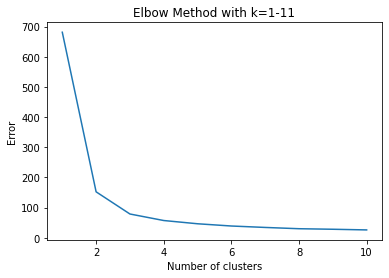

In [9]:
# estimate k with elbow method
Error =[]
for i in range(1, 11):
    kmeans11 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0).fit(x)
    kmeans11.fit(x)
    Error.append(kmeans11.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow Method with k=1-11') #within cluster sum of squares
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.show()

In [10]:
kmeans3 = KMeans(n_clusters=3, random_state=21)
y = kmeans3.fit_predict(x)
kmeans3.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

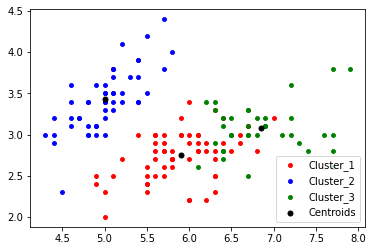

In [11]:
plt.scatter(x[y == 0,0], x[y==0,1], s = 15, c= 'red', label = 'Cluster_1')
plt.scatter(x[y == 1,0], x[y==1,1], s = 15, c= 'blue', label = 'Cluster_2')
plt.scatter(x[y == 2,0], x[y==2,1], s = 15, c= 'green', label = 'Cluster_3')
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s = 25, c = 'black', label = 'Centroids')
plt.legend()
plt.show()